# Test For Multicolinearity



Multicollinearity is a statistical phenomenon that occurs when two or more independent variables(feature metrics) in a regression model are highly correlated with each other. In other words, multicollinearity indicates a strong linear relationship among the predictor variables.



### Why check for Multicollinearity?
The presence of multicollinearity poses several problems to a regression model:  

(1) It renders the coefficients unreliable  

(2) Confidence in the model decreases  

(3) Model interpretation becomes challenging  

High multicollinearity makes it challenging to interpret the results of a regression analysis accurately. It becomes difficult to determine the individual effects of each predictor variable on the outcome, as the correlated predictors may share explanatory power. This can lead to incorrect conclusions about which predictors are truly significant in explaining the variability in the response variable. Therefore addressing multicollinearity helps improve the stability and generalization of the regression model.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant 


In [3]:
df = pd.read_csv('../data/cleaned_df.zip', compression='zip', index_col=0)

In [4]:
df.head()


,location,bath,balcony,price,House_size,new_total_sqft
2,Uttarahalli,2.0,3.0,62.00,3.0,1440.0
3,Lingadheeranahalli,3.0,1.0,95.00,3.0,1521.0
4,Kothanur,2.0,1.0,51.00,2.0,1200.0
8,Marathahalli,3.0,1.0,63.25,3.0,1310.0
10,Whitefield,2.0,2.0,70.00,3.0,1800.0


It is well known that multicollinearity detection methods rely on numerical data. These methods calculate correlation coefficients or variance inflation factors (VIFs) between predictor variables, which requires numerical inputs. If categorical variables are not encoded, multicollinearity checks cannot be accurately performed. For this reason, we use encode the categorical column in our dataset.

In [5]:
df["location"].nunique()

849

Encoding the location column using categorical frequency encoding method.

In [6]:
frequency_map = df['location'].value_counts(normalize=True).to_dict()

# Apply frequency encoding
df['Category_Frequency_Encoded'] = df['location'].map(frequency_map)

In [7]:
df.head()

,location,bath,balcony,price,House_size,new_total_sqft,Category_Frequency_Encoded
2,Uttarahalli,2.0,3.0,62.00,3.0,1440.0,0.021298
3,Lingadheeranahalli,3.0,1.0,95.00,3.0,1521.0,0.002430
4,Kothanur,2.0,1.0,51.00,2.0,1200.0,0.006861
8,Marathahalli,3.0,1.0,63.25,3.0,1310.0,0.016581
10,Whitefield,2.0,2.0,70.00,3.0,1800.0,0.044883


In [8]:
df_num =  df.drop(columns=["location","price"])
df_num.head()

,bath,balcony,House_size,new_total_sqft,Category_Frequency_Encoded
2,2.0,3.0,3.0,1440.0,0.021298
3,3.0,1.0,3.0,1521.0,0.002430
4,2.0,1.0,2.0,1200.0,0.006861
8,3.0,1.0,3.0,1310.0,0.016581
10,2.0,2.0,3.0,1800.0,0.044883


In [9]:
corr =df_num.corr()
corr

,bath,balcony,House_size,new_total_sqft,Category_Frequency_Encoded
bath,1.000000,0.195703,0.649493,0.628447,-0.000738
balcony,0.195703,1.000000,0.173853,0.251979,-0.014486
House_size,0.649493,0.173853,1.000000,0.643539,-0.031742
new_total_sqft,0.628447,0.251979,0.643539,1.000000,0.016814
Category_Frequency_Encoded,-0.000738,-0.014486,-0.031742,0.016814,1.000000


<Axes: >

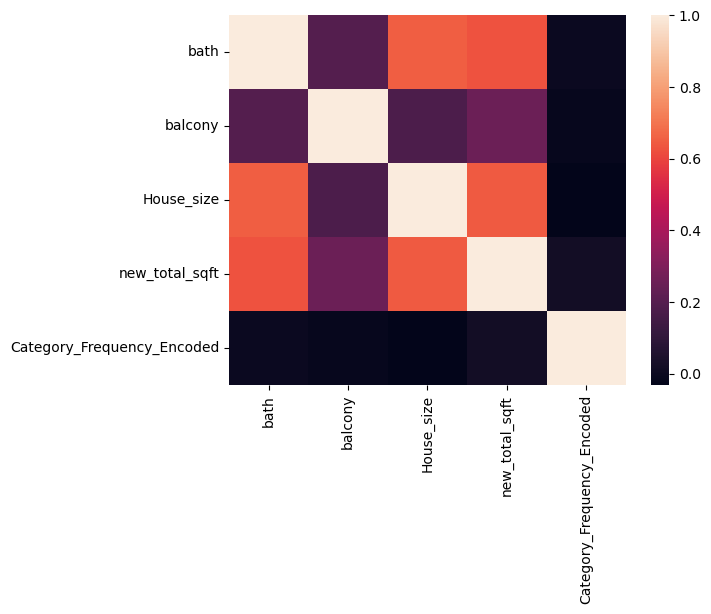

In [10]:
sns.heatmap(corr)

To check if our multicollinearity plot is efficient and good enough for model bulding, we apply the Ordinary least square summary. 

In [11]:
X = df_num
y = df['price']


# Add a constant term for the intercept
X = sm.add_constant(X)  


# Fit the OLS model that includes an intercept term
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     632.6
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:37:56   Log-Likelihood:                -32055.
No. Observations:                6996   AIC:                         6.412e+04
Df Residuals:                    6990   BIC:                         6.416e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

From Our summary it shows that condition number is large implying there might be strong multicollinearity or other numerical problems. 

 Therefore to confirm if the large condition number is as a result of multicollinearity, we apply the Variance Inflation Factor method

In [12]:
# Add a constant column for intercept in the DataFrame
X = add_constant(df_num)
# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                     Variable        VIF
0                       const  46.087040
1                        bath   1.994537
2                     balcony   1.070846
3                  House_size   2.061265
4              new_total_sqft   2.017639
5  Category_Frequency_Encoded   1.003832


The VIF results suggest that there is no multicollinearity issue among the predictor variables in your regression model, since the values of VIF are lesser than the threshole of the VIF.